<a href="https://colab.research.google.com/github/pradeepkc11/mpl_tutorial/blob/master/03_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('03-logistic-regression')
jovian.set_colab_id('1f1YRqrPokKcJh716YVx3Jdxb6haVELB5')

     |████████████████████████████████| 71kB 5.4MB/s 


In [ ]:
# Uncomment and run the appropriate command for your operating system, if required

# Linux / Binder
# !pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Windows
# !pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# MacOS
# !pip install numpy matplotlib torch torchvision torchaudio

In [2]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [3]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


When this statement is executed for the first time, it downloads the data to the `data/` directory next to the notebook and creates a PyTorch `Dataset`. On subsequent executions, the download is skipped as the data is already downloaded. Let's check the size of the dataset.

In [4]:
len(dataset)

60000

The dataset has 60,000 images that we'll use to train the model. There is also an additional test set of 10,000 images used for evaluating models and reporting metrics in papers and reports. We can create the test dataset using the `MNIST` class by passing `train=False` to the constructor.

In [5]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

Let's look at a sample element from the training dataset.

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F3D17FD29D0>, 5)

It's a pair, consisting of a 28x28px image and a label. The image is an object of the class `PIL.Image.Image`, which is a part of the Python imaging library [Pillow](https://pillow.readthedocs.io/en/stable/). We can view the image within Jupyter using [`matplotlib`](https://matplotlib.org/), the de-facto plotting and graphing library for data science in Python.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


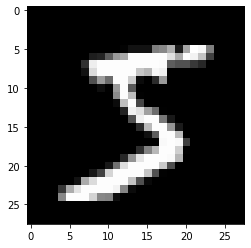

In [8]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


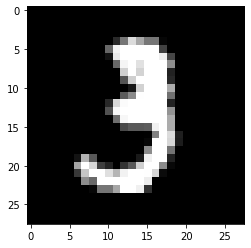

In [9]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

It's evident that these images are relatively small in size, and recognizing the digits can sometimes be challenging even for the human eye. While it's useful to look at these images, there's just one problem here: PyTorch doesn't know how to work with images. We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.

In [10]:
import torchvision.transforms as transforms

PyTorch datasets allow us to specify one or more transformation functions that are applied to the images as they are loaded. The `torchvision.transforms` module contains many such predefined functions. We'll use the `ToTensor` transform to convert images into PyTorch tensors.

In [11]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [12]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


The image is now converted to a 1x28x28 tensor. The first dimension tracks color channels. The second and third dimensions represent pixels along the height and width of the image, respectively. Since images in the MNIST dataset are grayscale, there's just one channel. Other datasets have images with color, in which case there are three channels: red, green, and blue (RGB). 

Let's look at some sample values inside the tensor.

In [13]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


The values range from 0 to 1, with `0` representing black, `1` white, and the values in between different shades of grey. We can also plot the tensor as an image using `plt.imshow`.

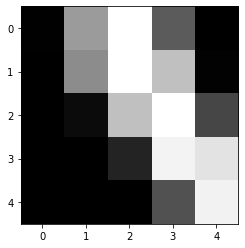

In [14]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [15]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [16]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

We set `shuffle=True` for the training data loader to ensure that the batches generated in each epoch are different. This randomization helps generalize & speed up the training process. On the other hand, since the validation data loader is used only for evaluating the model, there is no need to shuffle the images. 


`jovian.commit` uploads the notebook to your Jovian account, captures the Python environment, and creates a shareable link for your notebook, as shown above. You can use this link to share your work and let anyone (including you) run your notebooks and reproduce your work.

In [18]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

Of course, this model is a lot larger than our previous model in terms of the number of parameters. Let's take a look at the weights and biases.

In [19]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0280,  0.0051,  0.0145,  ...,  0.0218, -0.0314,  0.0171],
        [-0.0298, -0.0255,  0.0048,  ..., -0.0167,  0.0149, -0.0064],
        [-0.0158,  0.0152,  0.0021,  ...,  0.0229,  0.0037,  0.0279],
        ...,
        [-0.0008, -0.0011,  0.0078,  ...,  0.0347,  0.0179, -0.0030],
        [-0.0116, -0.0187, -0.0082,  ..., -0.0354, -0.0051, -0.0018],
        [ 0.0180,  0.0081,  0.0028,  ..., -0.0350,  0.0008, -0.0218]],
       requires_grad=True)

In [20]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0355,  0.0305, -0.0158,  0.0357, -0.0054, -0.0146,  0.0055,  0.0084,
        -0.0247, -0.0071], requires_grad=True)

Although there are a total of 7850 parameters here, conceptually, nothing has changed so far. Let's try and generate some outputs using our model. We'll take the first batch of 100 images from our dataset and pass them into our model.

In [22]:
images.shape

torch.Size([128, 1, 28, 28])

In [23]:
images.reshape(128, 784).shape

torch.Size([128, 784])

Here's how we create or _instantiate_ an object of the class `Person`.

In [28]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

Inside the `__init__` constructor method, we instantiate the weights and biases using `nn.Linear`. And inside the `forward` method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into `self.linear`.

`xb.reshape(-1, 28*28)` indicates to PyTorch that we want a *view* of the `xb` tensor with two dimensions. The length along the 2nd dimension is 28\*28 (i.e., 784). One argument to `.reshape` can be set to `-1` (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

Note that the model no longer has `.weight` and `.bias` attributes (as they are now inside the `.linear` attribute), but it does have a `.parameters` method that returns a list containing the weights and bias.

In [29]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [30]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0108, -0.0006, -0.0342,  ...,  0.0093,  0.0043, -0.0249],
         [ 0.0169, -0.0004,  0.0202,  ...,  0.0016,  0.0010, -0.0105],
         [ 0.0218, -0.0355, -0.0268,  ..., -0.0156,  0.0055,  0.0184],
         ...,
         [ 0.0148,  0.0008, -0.0098,  ..., -0.0204,  0.0137, -0.0307],
         [ 0.0223,  0.0019,  0.0257,  ...,  0.0325,  0.0242, -0.0185],
         [ 0.0214, -0.0307, -0.0086,  ..., -0.0157, -0.0095, -0.0073]],
        requires_grad=True), Parameter containing:
 tensor([-0.0079, -0.0325, -0.0068,  0.0033,  0.0131, -0.0135, -0.0150, -0.0212,
         -0.0175, -0.0060], requires_grad=True)]

We can use our new custom model in the same way as before. Let's see if it works.

In [31]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0268, -0.0124,  0.0201, -0.0377, -0.2822,  0.2192, -0.1793, -0.1187,
          0.0660,  0.1756],
        [-0.0952, -0.0418, -0.0683, -0.0207, -0.0605, -0.0721, -0.0642, -0.1296,
          0.0760, -0.0772]])


In [32]:
import torch.nn.functional as F

The softmax function is included in the `torch.nn.functional` package and requires us to specify a dimension along which the function should be applied.

In [33]:
outputs[:2]

tensor([[ 0.0268, -0.0124,  0.0201, -0.0377, -0.2822,  0.2192, -0.1793, -0.1187,
          0.0660,  0.1756],
        [-0.0952, -0.0418, -0.0683, -0.0207, -0.0605, -0.0721, -0.0642, -0.1296,
          0.0760, -0.0772]], grad_fn=<SliceBackward>)

In [34]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1029, 0.0989, 0.1022, 0.0965, 0.0756, 0.1247, 0.0837, 0.0890, 0.1070,
         0.1194],
        [0.0960, 0.1012, 0.0986, 0.1034, 0.0993, 0.0982, 0.0990, 0.0927, 0.1139,
         0.0977]])
Sum:  1.0


Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using `torch.max`, which returns each row's largest element and the corresponding index.

In [35]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 8, 8, 1, 8, 8, 5, 8, 1, 5, 8, 8, 5, 2, 8, 8, 2, 3, 8, 0, 7, 8, 3, 7,
        8, 8, 3, 9, 3, 8, 6, 5, 7, 7, 7, 2, 8, 3, 2, 7, 8, 3, 5, 2, 3, 2, 8, 3,
        5, 8, 5, 3, 8, 5, 8, 3, 5, 5, 3, 8, 2, 5, 8, 8, 8, 7, 1, 8, 2, 9, 5, 5,
        5, 8, 8, 5, 8, 9, 3, 3, 3, 5, 8, 5, 6, 1, 8, 8, 8, 5, 7, 8, 2, 3, 2, 3,
        3, 8, 2, 9, 3, 3, 5, 6, 8, 8, 2, 3, 7, 8, 8, 8, 3, 3, 8, 8, 3, 2, 8, 7,
        8, 2, 8, 3, 2, 3, 2, 3])
tensor([0.1247, 0.1139, 0.1415, 0.1472, 0.1178, 0.1149, 0.1305, 0.1320, 0.1285,
        0.1202, 0.1251, 0.1334, 0.1244, 0.1304, 0.1398, 0.1207, 0.1120, 0.1319,
        0.1632, 0.1163, 0.1264, 0.1244, 0.1424, 0.1175, 0.1278, 0.1306, 0.1294,
        0.1298, 0.1218, 0.1204, 0.1232, 0.1327, 0.1183, 0.1351, 0.1218, 0.1511,
        0.1329, 0.1181, 0.1471, 0.1242, 0.1336, 0.1177, 0.1418, 0.1206, 0.1282,
        0.1327, 0.1478, 0.1300, 0.1495, 0.1249, 0.1253, 0.1367, 0.1229, 0.1347,
        0.1405, 0.1167, 0.1351, 0.1182, 0.1312, 0.1308, 0.1309, 0.1271, 0.1286,
       

The numbers printed above are the predicted labels for the first batch of training images. Let's compare them with the actual labels.

In [36]:
labels

tensor([7, 5, 9, 7, 6, 8, 0, 9, 6, 5, 9, 1, 5, 0, 8, 1, 5, 3, 7, 7, 2, 1, 8, 3,
        8, 4, 2, 2, 7, 6, 9, 8, 0, 7, 2, 0, 9, 1, 0, 4, 1, 0, 3, 3, 8, 8, 6, 5,
        3, 3, 7, 2, 6, 5, 6, 7, 1, 7, 1, 6, 3, 5, 4, 1, 9, 9, 5, 8, 0, 4, 6, 5,
        4, 7, 8, 5, 9, 5, 3, 0, 8, 6, 6, 2, 4, 0, 9, 6, 8, 3, 9, 6, 9, 9, 3, 0,
        3, 9, 4, 6, 2, 5, 6, 4, 3, 9, 8, 3, 4, 6, 9, 1, 1, 0, 6, 6, 8, 5, 7, 6,
        8, 5, 9, 1, 0, 8, 0, 3])

Most of the predicted labels are different from the actual labels. That's because we have started with randomly initialized weights and biases. We need to train the model, i.e., adjust the weights using gradient descent to make better predictions.

## Evaluation Metric and Loss Function

Just as with linear regression, we need a way to evaluate how well our model is performing. A natural way to do this would be to find the percentage of labels that were predicted correctly, i.e,. the **accuracy** of the predictions. 

In [37]:
outputs[:2]

tensor([[ 0.0268, -0.0124,  0.0201, -0.0377, -0.2822,  0.2192, -0.1793, -0.1187,
          0.0660,  0.1756],
        [-0.0952, -0.0418, -0.0683, -0.0207, -0.0605, -0.0721, -0.0642, -0.1296,
          0.0760, -0.0772]], grad_fn=<SliceBackward>)

In [38]:
torch.sum(preds == labels)

tensor(19)

In [39]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [40]:
accuracy(outputs, labels)

tensor(0.1484)

In [41]:
probs

tensor([[0.1029, 0.0989, 0.1022,  ..., 0.0890, 0.1070, 0.1194],
        [0.0960, 0.1012, 0.0986,  ..., 0.0927, 0.1139, 0.0977],
        [0.1105, 0.0726, 0.0917,  ..., 0.0757, 0.1415, 0.0862],
        ...,
        [0.0974, 0.1079, 0.1040,  ..., 0.0645, 0.1177, 0.0993],
        [0.0727, 0.1222, 0.1404,  ..., 0.0959, 0.0968, 0.0903],
        [0.0925, 0.1021, 0.1226,  ..., 0.0889, 0.0916, 0.1073]],
       grad_fn=<SoftmaxBackward>)

In [42]:
outputs

tensor([[ 0.0268, -0.0124,  0.0201,  ..., -0.1187,  0.0660,  0.1756],
        [-0.0952, -0.0418, -0.0683,  ..., -0.1296,  0.0760, -0.0772],
        [ 0.0918, -0.3285, -0.0951,  ..., -0.2861,  0.3392, -0.1564],
        ...,
        [ 0.0135,  0.1162,  0.0792,  ..., -0.3990,  0.2031,  0.0323],
        [-0.3845,  0.1351,  0.2738,  ..., -0.1068, -0.0977, -0.1673],
        [-0.1329, -0.0342,  0.1489,  ..., -0.1718, -0.1422,  0.0155]],
       grad_fn=<AddmmBackward>)

In [43]:
loss_fn = F.cross_entropy

In [44]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3369, grad_fn=<NllLossBackward>)


We know that cross-entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples. Therefore, one way to interpret the resulting number e.g. `2.23` is look at `e^-2.23` which is around `0.1` as the predicted probability of the correct label, on average. *The lower the loss, The better the model.*

In [45]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

The `fit` function records the validation loss and metric from each epoch. It returns a history of the training, useful for debugging & visualization.

Configurations like batch size, learning rate, etc. (called hyperparameters), need to picked in advance while training machine learning models. Choosing the right hyperparameters is critical for training a reasonably accurate model within a reasonable amount of time. It is an active area of research and experimentation in machine learning. Feel free to try different learning rates and see how it affects the training process.


Let's define the `evaluate` function, used in the validation phase of `fit`.

In [48]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


Finally, let's redefine the `MnistModel` class to include additional methods `training_step`, `validation_step`, `validation_epoch_end`, and `epoch_end` used by `fit` and `evaluate`.

In [49]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

Before we train the model, let's see how the model performs on the validation set with the initial set of randomly initialized weights & biases.



In [50]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.061115507036447525, 'val_loss': 2.3166043758392334}

The initial accuracy is around 10%, which one might expect from a randomly initialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).

We are now ready to train the model. Let's train for five epochs and look at the results.

In [51]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9494, val_acc: 0.6417
Epoch [1], val_loss: 1.6826, val_acc: 0.7383
Epoch [2], val_loss: 1.4832, val_acc: 0.7683
Epoch [3], val_loss: 1.3320, val_acc: 0.7851
Epoch [4], val_loss: 1.2156, val_acc: 0.7982


That's a great result! With just 5 epochs of training, our model has reached an accuracy of over 80% on the validation set. Let's see if we can improve that by training for a few more epochs. Try changing the learning rates and number of epochs in each of the cells below.

In [52]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1239, val_acc: 0.8075
Epoch [1], val_loss: 1.0504, val_acc: 0.8139
Epoch [2], val_loss: 0.9902, val_acc: 0.8192
Epoch [3], val_loss: 0.9400, val_acc: 0.8237
Epoch [4], val_loss: 0.8976, val_acc: 0.8275


In [53]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8612, val_acc: 0.8317
Epoch [1], val_loss: 0.8297, val_acc: 0.8341
Epoch [2], val_loss: 0.8022, val_acc: 0.8385
Epoch [3], val_loss: 0.7778, val_acc: 0.8428
Epoch [4], val_loss: 0.7561, val_acc: 0.8441


In [54]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7366, val_acc: 0.8466
Epoch [1], val_loss: 0.7190, val_acc: 0.8487
Epoch [2], val_loss: 0.7030, val_acc: 0.8499
Epoch [3], val_loss: 0.6885, val_acc: 0.8520
Epoch [4], val_loss: 0.6751, val_acc: 0.8542


While the accuracy does continue to increase as we train for more epochs, the improvements get smaller with every epoch. Let's visualize this using a line graph.

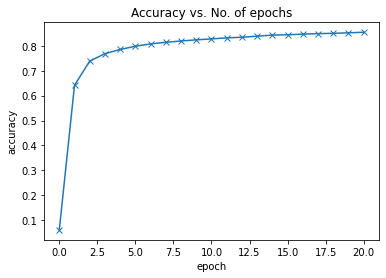

In [55]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

It's quite clear from the above picture that the model probably won't cross the accuracy threshold of 90% even after training for a very long time. One possible reason for this is that the learning rate might be too high. The model's parameters may be "bouncing" around the optimal set of parameters for the lowest loss. You can try reducing the learning rate and training for a few more epochs to see if it helps.

The more likely reason that **the model just isn't powerful enough**. If you remember our initial hypothesis, we have assumed that the output (in this case the class probabilities) is a **linear function** of the input (pixel intensities), obtained by perfoming a matrix multiplication with the weights matrix and adding the bias. This is a fairly weak assumption, as there may not actually exist a linear relationship between the pixel intensities in an image and the digit it represents. While it works reasonably well for a simple dataset like MNIST (getting us to 85% accuracy), we need more sophisticated models that can capture non-linear relationships between image pixels and labels for complex tasks like recognizing everyday objects, animals etc. 

Let's save our work using `jovian.commit`. Along with the notebook, we can also record some metrics from our training.

## Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by recreating the test dataset with the `ToTensor` transform.

In [58]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Here's a sample image from the dataset.

Shape: torch.Size([1, 28, 28])
Label: 7


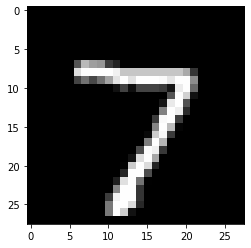

In [59]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [60]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

`img.unsqueeze` simply adds another dimension at the begining of the 1x28x28 tensor, making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.

Let's try it out with a few images.

Label: 7 , Predicted: 7


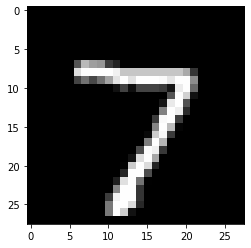

In [61]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


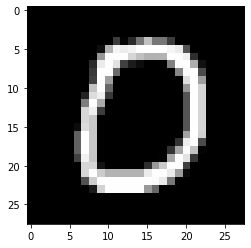

In [62]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 3


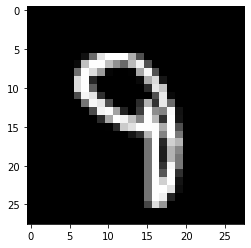

In [63]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


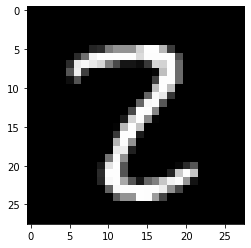

In [64]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [65]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.861035168170929, 'val_loss': 0.6424325704574585}

We expect this to be similar to the accuracy/loss on the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

## Saving and loading the model

In [66]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model.

In [67]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0151, -0.0113,  0.0045,  ..., -0.0111, -0.0239, -0.0173],
                      [-0.0249,  0.0024, -0.0137,  ..., -0.0022, -0.0095,  0.0096],
                      [ 0.0267, -0.0046, -0.0131,  ..., -0.0015,  0.0086,  0.0346],
                      ...,
                      [ 0.0352, -0.0284,  0.0061,  ..., -0.0100,  0.0111,  0.0058],
                      [-0.0340,  0.0119, -0.0115,  ..., -0.0250,  0.0044, -0.0219],
                      [ 0.0246,  0.0345, -0.0094,  ...,  0.0337, -0.0222, -0.0227]])),
             ('linear.bias',
              tensor([-0.0695,  0.0783, -0.0144, -0.0165,  0.0357,  0.0714,  0.0074,  0.0647,
                      -0.0706, -0.0215]))])

To load the model weights, we can instante a new object of the class `MnistModel`, and use the `.load_state_dict` method.

In [68]:
model2 = MnistModel()

In [69]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-2.1938e-02, -1.4049e-02,  1.0097e-02,  ...,  1.6160e-02,
                        2.4741e-02,  3.3888e-02],
                      [ 3.0977e-02, -1.6397e-02, -2.1092e-02,  ...,  2.9806e-02,
                        7.2487e-03,  2.8843e-02],
                      [ 1.6792e-04,  1.6043e-02, -1.1966e-02,  ..., -2.1404e-02,
                        1.1557e-02, -2.3528e-02],
                      ...,
                      [ 2.2107e-02,  1.5872e-02, -2.3242e-02,  ..., -3.4945e-02,
                        1.6031e-02,  9.6321e-03],
                      [-1.7691e-02,  2.8140e-02,  2.8226e-02,  ...,  1.6353e-02,
                        2.8904e-03,  7.5238e-04],
                      [ 1.3572e-02,  2.1589e-02,  3.0525e-02,  ...,  6.4556e-03,
                       -9.1712e-04, -7.4932e-07]])),
             ('linear.bias',
              tensor([-0.0296, -0.0196, -0.0227,  0.0280, -0.0325,  0.0317, -0.0092,  0.0106,
                      -0.0035,

In [70]:
evaluate(model2, test_loader)

{'val_acc': 0.15966796875, 'val_loss': 2.292834520339966}

In [71]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0151, -0.0113,  0.0045,  ..., -0.0111, -0.0239, -0.0173],
                      [-0.0249,  0.0024, -0.0137,  ..., -0.0022, -0.0095,  0.0096],
                      [ 0.0267, -0.0046, -0.0131,  ..., -0.0015,  0.0086,  0.0346],
                      ...,
                      [ 0.0352, -0.0284,  0.0061,  ..., -0.0100,  0.0111,  0.0058],
                      [-0.0340,  0.0119, -0.0115,  ..., -0.0250,  0.0044, -0.0219],
                      [ 0.0246,  0.0345, -0.0094,  ...,  0.0337, -0.0222, -0.0227]])),
             ('linear.bias',
              tensor([-0.0695,  0.0783, -0.0144, -0.0165,  0.0357,  0.0714,  0.0074,  0.0647,
                      -0.0706, -0.0215]))])

Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before.

In [72]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_acc': 0.861035168170929, 'val_loss': 0.6424325704574585}